In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("Ecommerce Customers.csv")

In [20]:
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [21]:
df.info()          #Tells the datatype of these features from dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [22]:
df.describe()     #Tells the statistical information about the numerical data (only)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


Exploratory Data Analysis

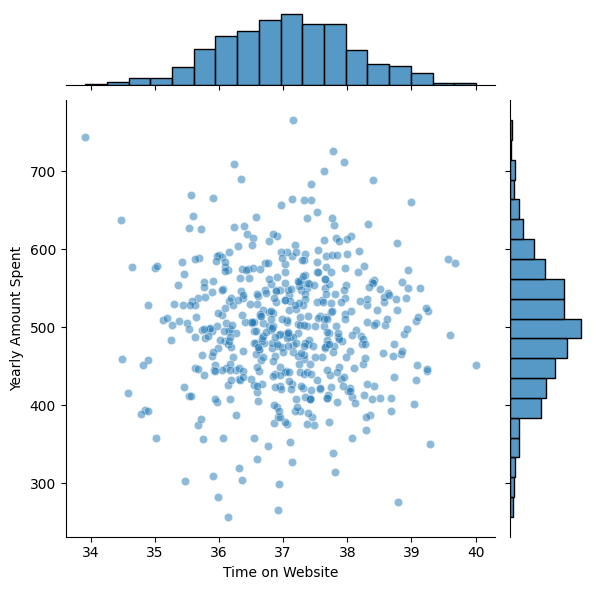

In [23]:
#Time Spent on Website vs Yearly Amount Spent

sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha=0.5)      

#jointplot - produces a scatterplot and a histogram for the data that we are selecting
#alpha is an optional parameter that changes the opacity or darkness of the scatter plots

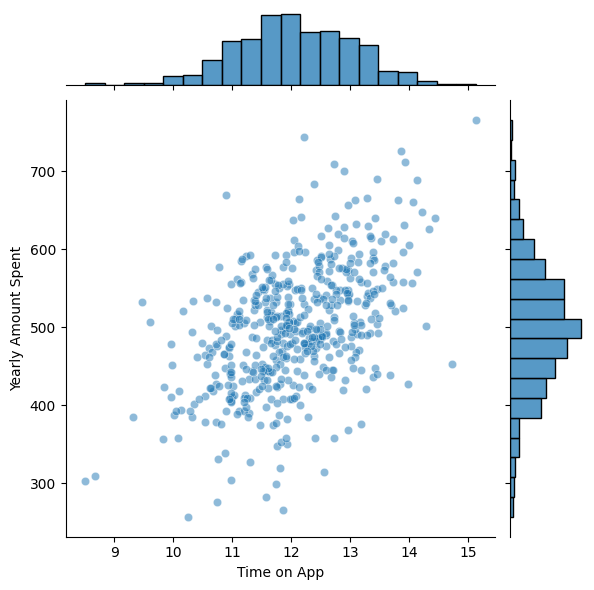

In [27]:
#Time Spent on App vs Yearly Amount Spent

sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df, alpha=0.5)         

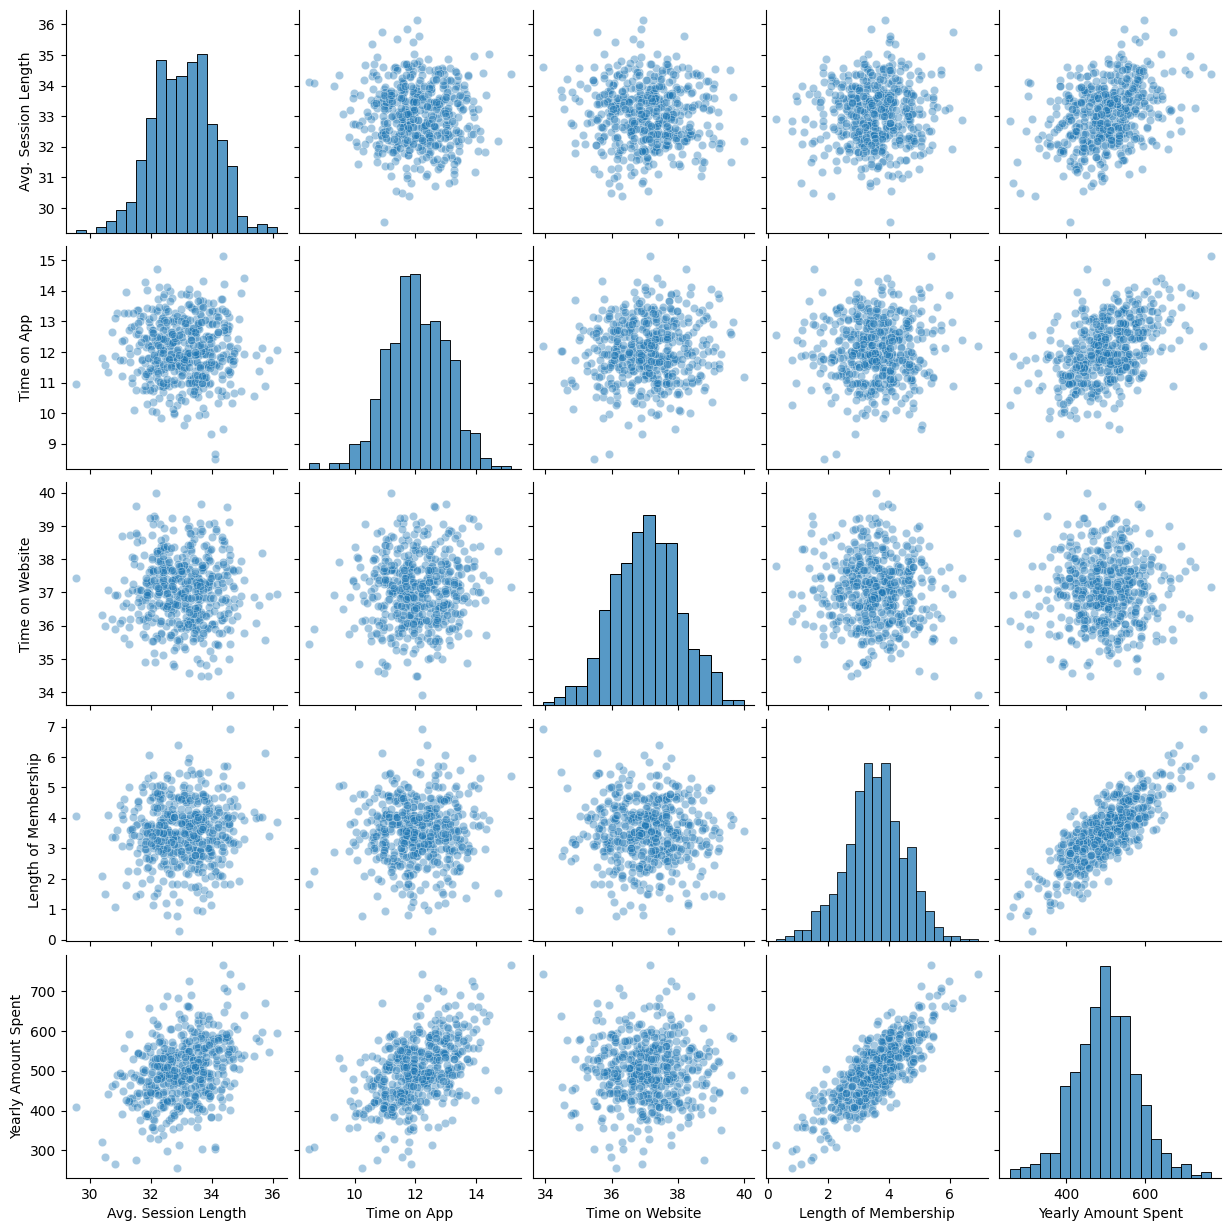

In [28]:
#Compare all the variables with each other using pairplot, 
#plot_kws is an optional parameter that lets you pass custom styling arguments to the individual scatter plots

sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.4})

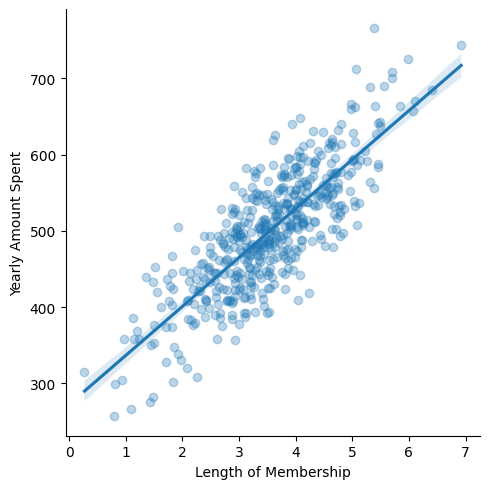

In [29]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df, scatter_kws={"alpha":0.3})

In [37]:
Features = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership' ]]
Target = df['Yearly Amount Spent']

In [50]:
Features_train, Features_test, Target_train, Target_test = train_test_split(Features, Target, test_size=0.3, random_state=42)

Training the model

In [43]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()           #initialising the object for LinearRegression

In [52]:
lm.fit(Features_train, Target_train)      #Produce a linear model or a line such that Given a certain X (features) you must get a specified target or as close as possible

LinearRegression()

In [53]:
lm.coef_                             #These are the weights the model assigns to our features

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

Predictions

In [54]:
predictions = lm.predict(Features_test)
predictions                             #Contains the values for Yearly Amount spent based on features data present in Features_test data

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Evaluation of our linear Model')

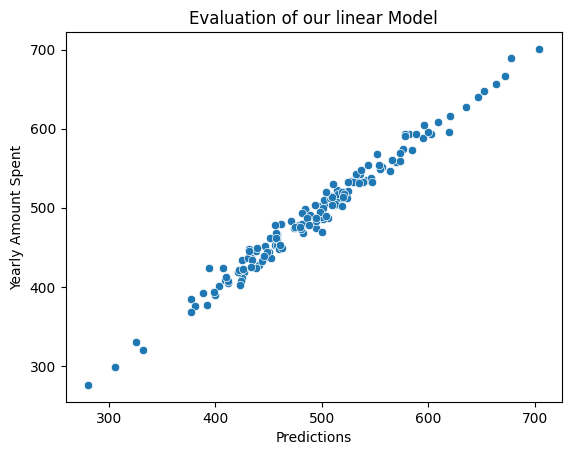

In [59]:
sns.scatterplot(x=predictions, y=Target_test)
plt.xlabel('Predictions')
plt.title('Evaluation of our linear Model')

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [62]:
print("Mean Absolute Error: ", mean_absolute_error(Target_test, predictions))                  #in our data, MAE will be having units as dollars
print("Mean Squared Error: ", mean_squared_error(Target_test, predictions))
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(Target_test, predictions)))    #in our data, RMSE will be having units as dollars

Mean Absolute Error:  8.426091641432095
Mean Squared Error:  103.91554136503318
Root Mean Squared Error:  10.193897260863148


Analysing the residuals

In [63]:
residuals = Target_test - predictions
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

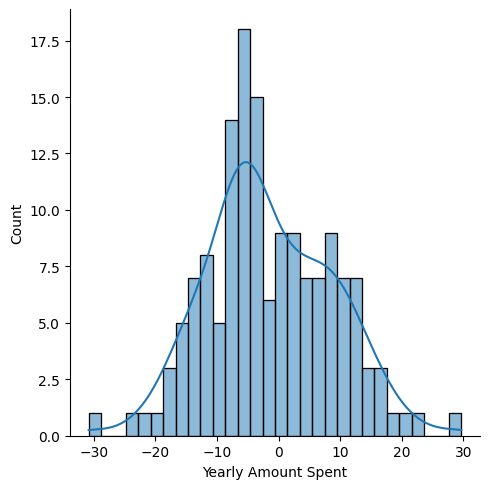

In [66]:
sns.displot(residuals, bins=30, kde=True)         
#We want to verify that residuals have a normal distribution. Because it is an important assumption in linear regression
